In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import math
import sys
import os
from geopy.geocoders import Nominatim
from folium import Choropleth,Circle,Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Path where all the crime report files are availab;e
folder_path = r'/content/drive/MyDrive/Boston_crime'

# Change the current working directory as the above folder path
os.chdir(folder_path)

files=os.listdir()

files

['crime_report_2015.csv',
 'crime_report_2016.csv',
 'crime_report_2017.csv',
 'crime_report_2018.csv',
 'crime_report_2019.csv',
 'crime_report_2020.csv',
 'crime_report_2021.csv',
 'crime_report_2022.csv',
 'crime-incident-reports-2015.csv',
 'crime-incident-reports-2016.csv',
 'crime-incident-reports-2017.csv',
 'crime-incident-reports-2018.csv',
 'crime-incident-reports-2019.csv',
 'crime-incident-reports-2020.csv',
 'crime-incident-reports-2022.csv',
 'rmsoffensecodes.xlsx',
 'crime_report_2023.csv',
 'crime_reports_cleaned.csv']

In [ ]:
data = pd.read_csv("crime_reports_cleaned.csv")
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
0,192074613,100,1,2019-09-16 23:46:00,2019,9,Monday,23,"(42.334529988231175, -71.08950599859743)",42.33453,-71.089506,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'road': 'Ruggles Street', 'suburb': 'South En...",Ruggles Street,NaN,South End,Boston,Suffolk County
1,I182101462,301,0,2018-12-16 17:30:00,2018,12,Sunday,17,"(42.334529988231175, -71.08950599859743)",42.33453,-71.089506,ROBBERY - STREET,ROBBERY,"{'road': 'Ruggles Street', 'suburb': 'South En...",Ruggles Street,NaN,South End,Boston,Suffolk County
2,192076520,400,0,2019-09-22 21:50:00,2019,9,Sunday,21,"(42.334529988231175, -71.08950599859743)",42.33453,-71.089506,MIGRATED REPORT - AGGRAVATED ASSAULT/AGGRAVATE...,ROBBERY,"{'road': 'Ruggles Street', 'suburb': 'South En...",Ruggles Street,NaN,South End,Boston,Suffolk County
3,192066401,413,0,2019-08-22 16:00:00,2019,8,Thursday,16,"(42.334529988231175, -71.08950599859743)",42.33453,-71.089506,ASSAULT - AGGRAVATED - BATTERY,AGGRAVATED ASSAULT,"{'road': 'Ruggles Street', 'suburb': 'South En...",Ruggles Street,NaN,South End,Boston,Suffolk County
4,192037802,423,0,2019-05-20 15:30:00,2019,5,Monday,15,"(42.334529988231175, -71.08950599859743)",42.33453,-71.089506,ASSAULT - AGGRAVATED,AGGRAVATED ASSAULT,"{'road': 'Ruggles Street', 'suburb': 'South En...",Ruggles Street,NaN,South End,Boston,Suffolk County


In [ ]:
violentList = ['MIGRATED REPORT - CRIMINAL HOMICIDE',
       'BURGLARY - RESIDENTIAL - FORCE', 'ASSAULT - SIMPLE', 'VANDALISM',
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER', 'ROBBERY - STREET',
       'ROBBERY - BANK', 'ROBBERY - OTHER',
       'MIGRATED REPORT - AGGRAVATED ASSAULT/AGGRAVATED ASSAULT & BATTERY',
       'ASSAULT - AGGRAVATED - BATTERY', 'ASSAULT - AGGRAVATED',
       'MIGRATED REPORT - BURGLARY/BREAKING AND ENTERING',
       'BURGLARY - RESIDENTIAL - ATTEMPT',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'BURGLARY - COMMERICAL - FORCE', 'BURGLARY - OTHER - NO FORCE',
       'MIGRATED REPORT - OTHER LARCENY', 'LARCENY PICK-POCKET',
       'LARCENY PURSE SNATCH - NO FORCE ', 'LARCENY SHOPLIFTING',
       'LARCENY THEFT OF BICYCLE', 'LARCENY THEFT FROM BUILDING',
       'LARCENY ALL OTHERS', 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE',
       'MIGRATED REPORT - LARCENY FROM MV', 'ASSAULT SIMPLE - BATTERY',
       'GRAFFITI', 'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'WEAPON - FIREARM - OTHER VIOLATION', 'FUGITIVE FROM JUSTICE',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'WARRANT ARREST',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT',
       'FIRE REPORT - CAR, BRUSH, ETC.', 'MISSING PERSON - LOCATED',
       'MISSING PERSON - NOT REPORTED - LOCATED',
       'MIGRATED REPORT - ROBBERY', 'ROBBERY - COMMERCIAL',
       'ROBBERY - CAR JACKING', 'CHILD ENDANGERMENT (NO ASSAULT)',
       'CHILD ABANDONMENT (NO ASSAULT)', 'CHILD ENDANGERMENT',
       'MIGRATED REPORT - INVESTIGATE PROPERTY',
       'FIRE REPORT/ALARM - FALSE', 'ROBBERY - HOME INVASION', 'ARSON',
       'MIGRATED REPORT - WEAPONS VIOLATION', 'BOMB THREAT',
       'BURGLARY - COMMERICAL - ATTEMPT', 'HOME INVASION', 'STALKING',
       'BURGLARY - OTHER - FORCE',
       'WEAPON - FIREARM - SALE / TRAFFICKING',
       'MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE',
       'MANSLAUGHTER - VEHICLE - NEGLIGENCE',
       'BURGLARY - COMMERICAL - NO FORCE',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'LARCENY THEFT FROM COIN-OP MACHINE',
       'EXPLOSIVES - TURNED IN OR FOUND', 'CHINS',
       'CONTRIBUTING TO DELINQUENCY OF MINOR',
       'MANSLAUGHTER - TRAIN ETC. VICTIM NON-NEGLIGENCE',
       'ROBBERY - UNARMED - RESIDENCE', 'EXPLOSIVES - POSSESSION OR USE',
       'LARCENY IN A BUILDING UNDER $50', 'KILLING OF FELON BY POLICE',
       'PRISONER - SUICIDE / SUICIDE ATTEMPT', 'ROBBERY - KNIFE - STREET',
       'B&E NON-RESIDENCE NIGHT - FORCE',
       'MIGRATED REPORT - COUNTERFEITING/FORGERY',
       'ROBBERY ATTEMPT - KNIFE - BANK', 'LARCENY SHOPLIFTING UNDER $50',
       'B&E NON-RESIDENCE NIGHT - ATTEMPT FORCE', 'JUSTIFIABLE HOMICIDE',
       'BURGLARY - OTHER - ATTEMPT', 'ROBBERY - UNARMED - BUSINESS',
       'ROBBERY - UNARMED - CHAIN STORE', 'BIOLOGICAL THREATS',
       'ASSAULT & BATTERY D/W - OTHER', 'A&B ON POLICE OFFICER',
       'ASSAULT & BATTERY D/W - KNIFE',
       'PRISONER ESCAPE / ESCAPE & RECAPTURE',
       'LARCENY IN A BUILDING $50 TO $199', 'LARCENY OTHER $50 TO $199',
       'LARCENY SHOPLIFTING $50 TO $199',
       'B&E NON-RESIDENCE DAY - NO PROP TAKEN',
       'ROBBERY - UNARMED - STREET', 'LARCENY OTHER UNDER $50',
       'ASSAULT D/W - KNIFE ON POLICE OFFICER',
       'A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.',
       'PRISONER ATTEMPT TO RESCUE',
       'B&E RESIDENCE NIGHT - ATTEMPT FORCE',
       'B&E RESIDENCE DAY - NO PROP TAKEN']

In [ ]:
data['VIOLENT'] = np.where(data['OFFENSE_DESCRIPTION'].isin(violentList),1,0)
data["VIOLENT"] = data["VIOLENT"].astype("category")


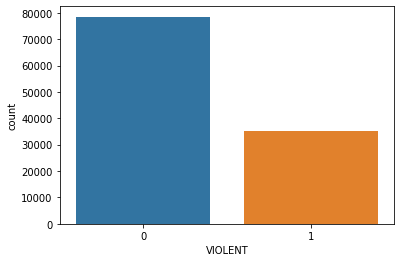

In [ ]:
fig = sns.countplot(data=data, x = "VIOLENT")
fig = fig.get_figure()

In [ ]:
fig.savefig("Count_Violent_vs_nonviolent.png") 

## #Crimes by Category

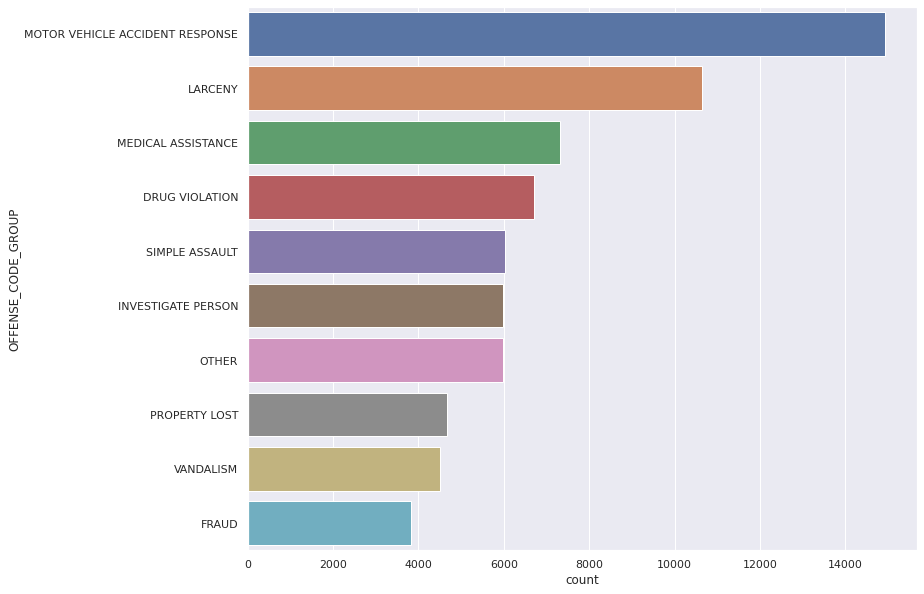

In [ ]:
sns.set(rc={'figure.figsize':(12, 10)})

fig = sns.countplot(y = "OFFENSE_CODE_GROUP",
              data = data, 
              order = data.OFFENSE_CODE_GROUP.value_counts().iloc[:10].index)
fig = fig.get_figure()
fig.savefig("Crime_Categories.png") 

In [ ]:
sns.set(rc={'figure.figsize':(12, 10)})

fig = sns.countplot(y = "OFFENSE_CODE_GROUP",
              data = data, 
              order = data.OFFENSE_CODE_GROUP.value_counts().iloc[:10].index)
fig = fig.get_figure()
fig.savefig("Type_of_Crimes_Countplot.png") 

In [ ]:
crime_by_monYear = data.groupby(['MONTH', 'YEAR', 'VIOLENT']).size().reset_index(name='counts')
count_monYear = data.groupby(['MONTH', 'YEAR']).count().reset_index()


In [ ]:
count_monYear

,MONTH,YEAR,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,VIOLENT
0,1,2016,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,1347,579,1300,1347,1347,1347
1,1,2017,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,570,1422,1468,1468,1468
2,1,2018,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,588,1477,1518,1518,1518
3,1,2019,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,1068,2392,2434,2434,2434
4,1,2020,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,1014,1568,1747,1747,1747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,12,2016,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525,666,1467,1525,1525,1525
66,12,2017,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,572,1414,1456,1456,1456
67,12,2018,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,564,1427,1471,1471,1471
68,12,2019,800,800,800,800,800,800,800,800,800,800,800,800,800,643,636,800,800,800


## HeatMaps of crimes for Boston from 2018-2021

In [ ]:
heatMap_2018 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2018 = data[data["YEAR"] == 2018]
heat_data_2018 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2018.iterrows()]

HeatMap(data = heat_data_2018, radius = 10).add_to(heatMap_2018)

In [ ]:
heatMap_2018.save('crime_y2018.html')

In [ ]:
heatMap_2019 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2019 = data[data["YEAR"] == 2019]
heat_data_2019 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2019.iterrows()]

HeatMap(data = heat_data_2019, radius = 10).add_to(heatMap_2019)

In [ ]:
heatMap_2019.save('crime_y2019.html')

In [ ]:
heatMap_2020 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2020 = data[data["YEAR"] == 2020]
heat_data_2020 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2020.iterrows()]

HeatMap(data = heat_data_2020, radius = 10).add_to(heatMap_2020)

In [ ]:
heatMap_2020.save('crime_y2020.html')

In [ ]:
heatMap_2021 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2021 = data[data["YEAR"] == 2021]
heat_data_2021 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2021.iterrows()]

HeatMap(data = heat_data_2021, radius = 10).add_to(heatMap_2021)



In [ ]:
heatMap_2021.save('crime_y2021.html')

## Cluster Maps for crime in Boston from 2018-2021

In [ ]:
clusterMap_2018 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2018.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clusterMap_2018.add_child(mc)

In [ ]:
clusterMap_2018.save('crime_2020_clustermap.html')

In [ ]:
clusterMap_2019 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2019.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clusterMap_2019.add_child(mc)

In [ ]:
clusterMap_2019.save('crime_2020_clustermap.html')

In [ ]:
clusterMap_2020 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2020.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clusterMap_2020.add_child(mc)



In [ ]:
clusterMap_2020.save('crime_2020_clustermap.html')

In [ ]:
clusterMap_2021 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2021.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clusterMap_2021.add_child(mc)


In [ ]:
clusterMap_2021.save('crime_2020_clustermap.html')

## Comparing violent and Non-violent crimes in 2020 and 2021

In [ ]:
heatMap2020_violent = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2020 = data[data["YEAR"] == 2020]
data2020_violent = data2020[data2020["VIOLENT"] == 1]

heat_data_2020_violent = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2020_violent.iterrows()]

HeatMap(data = heat_data_2020_violent, radius = 10).add_to(heatMap2020_violent)

heatMap2020_violent.save('violent_crime_2021_heatmap.html')

In [ ]:
heatMap2021_violent = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2021 = data[data["YEAR"] == 2021]
data2021_violent = data2021[data2021["VIOLENT"] == 1]

heat_data_2021_violent = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2021_violent.iterrows()]

HeatMap(data = heat_data_2021_violent, radius = 10).add_to(heatMap2021_violent)

heatMap2021_violent.save('violent_crime_2021_heatmap.html')